# Amino acid PCA

## 1. data check

there are 20 amino acids and seven descriptors



In [1]:
!cat /share/class/aminoacids.csv

AA,LCE,LCF,FET,POL,VOL,ASA,FE
Ala,0.23,0.31,-0.55,-0.02,82.2,254.2,8.5
Asn,-0.48,-0.60,0.51,-1.24,112.3,303.6,8.2
Asp,-0.61,-0.77,1.20,-1.08,103.7,287.9,8.5
Cys,0.45,1.54,-1.40,-0.11,99.1,282.9,11.0
Gln,-0.11,-0.22,0.29,-1.19,127.5,335.0,6.3
Glu,-0.51,-0.64,0.76,-1.43,120.5,311.6,8.8
Gly,0.00,0.00,0.00,0.03,65.0,224.9,7.1
His,0.15,0.13,-0.25,-1.06,140.6,337.2,10.1
Ile,1.20,1.80,-2.10,0.04,131.7,322.6,16.8
Leu,1.28,1.70,-2.00,0.12,131.5,324.0,15.0
Lys,-0.77,-0.99,0.7,-2.26,144.3,336.6,7.9
Met,0.90,1.23,-1.60,-0.33,132.3,336.3,13.3
Phe,1.56,1.79,-2.60,-0.05,155.8,366.1,11.2
Pro,0.38,0.49,-1.50,-0.31,106.7,288.5,8.2
Ser,0.00,-0.04,0.09,-0.40,88.5,266.7,7.4
Thr,0.17,0.26,-0.58,-0.53,105.3,283.9,8.8
Trp,1.85,2.25,-2.70,-0.31,185.9,401.8,9.9
Tyr,0.89,0.96,-1.70,-0.84,162.7,377.8,8.8
Val,0.71,1.22,-1.60,-0.13,115.6,295.1,12.0
Arg,-0.79,-1.01,2.00,-2.56,163.0,363.4,10.0


### Read aminoacids.csv file by pandas. It makes dataframe of bunch of series

In [2]:
import pandas as pd
# print pd.__version__
# from pandas import DataFrame, Series
data = pd.read_csv('/share/class/aminoacids.csv')
print data

     AA   LCE   LCF   FET   POL    VOL    ASA    FE
0   Ala  0.23  0.31 -0.55 -0.02   82.2  254.2   8.5
1   Asn -0.48 -0.60  0.51 -1.24  112.3  303.6   8.2
2   Asp -0.61 -0.77  1.20 -1.08  103.7  287.9   8.5
3   Cys  0.45  1.54 -1.40 -0.11   99.1  282.9  11.0
4   Gln -0.11 -0.22  0.29 -1.19  127.5  335.0   6.3
5   Glu -0.51 -0.64  0.76 -1.43  120.5  311.6   8.8
6   Gly  0.00  0.00  0.00  0.03   65.0  224.9   7.1
7   His  0.15  0.13 -0.25 -1.06  140.6  337.2  10.1
8   Ile  1.20  1.80 -2.10  0.04  131.7  322.6  16.8
9   Leu  1.28  1.70 -2.00  0.12  131.5  324.0  15.0
10  Lys -0.77 -0.99  0.70 -2.26  144.3  336.6   7.9
11  Met  0.90  1.23 -1.60 -0.33  132.3  336.3  13.3
12  Phe  1.56  1.79 -2.60 -0.05  155.8  366.1  11.2
13  Pro  0.38  0.49 -1.50 -0.31  106.7  288.5   8.2
14  Ser  0.00 -0.04  0.09 -0.40   88.5  266.7   7.4
15  Thr  0.17  0.26 -0.58 -0.53  105.3  283.9   8.8
16  Trp  1.85  2.25 -2.70 -0.31  185.9  401.8   9.9
17  Tyr  0.89  0.96 -1.70 -0.84  162.7  377.8   8.8
18  Val  0.7

### Features

- LCE, LCF are two lipophilicity constants of amino acid side chains(지방, 오일, 지질, 그리고 육지 또는 톨루엔과 같은 비극성 용매에 용해되는 화학 화합물의 능력을 말한다.)
- FET is the free energy of transfer of amino acid side chains from organic solvent into water
- POL is a polarity parameter
- VOL is the molecular volume of aminoacid
- ASA is the solvent-accessible surface area of the amino acid(용매 접근 가능 표면적)

In [3]:
print data.describe()

             LCE        LCF        FET        POL         VOL         ASA  \
count  20.000000  20.000000  20.000000  20.000000   20.000000   20.000000   
mean    0.325000   0.470500  -0.651500  -0.683000  123.710000  315.005000   
std     0.777008   1.028466   1.332829   0.764902   30.029335   43.831645   
min    -0.790000  -1.010000  -2.700000  -2.560000   65.000000  224.900000   
25%    -0.202500  -0.315000  -1.625000  -1.107500  104.900000  286.900000   
50%     0.200000   0.285000  -0.565000  -0.365000  124.000000  317.100000   
75%     0.892500   1.307500   0.345000  -0.095000  141.525000  336.750000   
max     1.850000   2.250000   2.000000   0.120000  185.900000  401.800000   

              FE  
count  20.000000  
mean    9.890000  
std     2.684439  
min     6.300000  
25%     8.200000  
50%     8.800000  
75%    11.050000  
max    16.800000  


### Drop the FE descriptor(last column) by iloc function

In [4]:
data2 = data.iloc[:,0:7]
print data2

     AA   LCE   LCF   FET   POL    VOL    ASA
0   Ala  0.23  0.31 -0.55 -0.02   82.2  254.2
1   Asn -0.48 -0.60  0.51 -1.24  112.3  303.6
2   Asp -0.61 -0.77  1.20 -1.08  103.7  287.9
3   Cys  0.45  1.54 -1.40 -0.11   99.1  282.9
4   Gln -0.11 -0.22  0.29 -1.19  127.5  335.0
5   Glu -0.51 -0.64  0.76 -1.43  120.5  311.6
6   Gly  0.00  0.00  0.00  0.03   65.0  224.9
7   His  0.15  0.13 -0.25 -1.06  140.6  337.2
8   Ile  1.20  1.80 -2.10  0.04  131.7  322.6
9   Leu  1.28  1.70 -2.00  0.12  131.5  324.0
10  Lys -0.77 -0.99  0.70 -2.26  144.3  336.6
11  Met  0.90  1.23 -1.60 -0.33  132.3  336.3
12  Phe  1.56  1.79 -2.60 -0.05  155.8  366.1
13  Pro  0.38  0.49 -1.50 -0.31  106.7  288.5
14  Ser  0.00 -0.04  0.09 -0.40   88.5  266.7
15  Thr  0.17  0.26 -0.58 -0.53  105.3  283.9
16  Trp  1.85  2.25 -2.70 -0.31  185.9  401.8
17  Tyr  0.89  0.96 -1.70 -0.84  162.7  377.8
18  Val  0.71  1.22 -1.60 -0.13  115.6  295.1
19  Arg -0.79 -1.01  2.00 -2.56  163.0  363.4


## We can calculate covariance each descriptors  easily by .cov function.

### Covariance vs Correlation 

### (1) Covariance: we can only gauge the direction of the relationship

#### Positive covariance: Indicates that two variables tend to move in the same direction.
#### Negative covariance: Reveals that two variables tend to move in inverse directions.

### (2) Corrleation: Correlation measures the strength of the relationship between variables.

#### The relationship between the two concepts can be expressed using the formula below

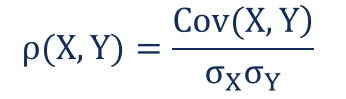

In [5]:
data2.cov()

,LCE,LCF,FET,POL,VOL,ASA
LCE,0.603742,0.775945,-0.998061,0.437289,8.719632,13.055237
LCF,0.775945,1.057742,-1.319578,0.607033,8.748311,13.083734
FET,-0.998061,-1.319578,1.776434,-0.788863,-10.676300,-16.160097
POL,0.437289,0.607033,-0.788863,0.585075,-8.023705,-11.101511
VOL,8.719632,8.748311,-10.676300,-8.023705,901.760947,1303.661526
ASA,13.055237,13.083734,-16.160097,-11.101511,1303.661526,1921.213132


### Correlation value between same descriptor must have 1.0 because correlation coefficient imply strength. Moreover Correlation scale range at -1~1 automatically. Usually check corr than cov.

### VOL with ASA have 0.990447 correlation which is highest 

In [6]:
data2.corr()

,LCE,LCF,FET,POL,VOL,ASA
LCE,1.000000,0.970991,-0.963733,0.735762,0.373703,0.383329
LCF,0.970991,1.000000,-0.962655,0.771644,0.283262,0.290238
FET,-0.963733,-0.962655,1.000000,-0.773786,-0.266748,-0.276619
POL,0.735762,0.771644,-0.773786,1.000000,-0.349320,-0.331122
VOL,0.373703,0.283262,-0.266748,-0.349320,1.000000,0.990447
ASA,0.383329,0.290238,-0.276619,-0.331122,0.990447,1.000000


### Q1. Change x_label, y_label name to "LCE", "VOL"

### Q2. Change color darker and size bigger

#### We can guess VOL and LCE has positive correlation from the picture

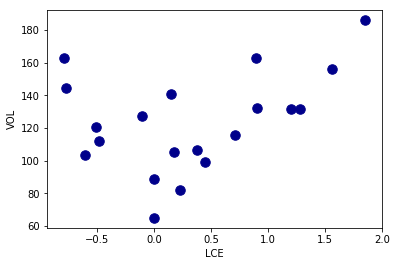

In [7]:
plot_df=pd.DataFrame(columns=['X','Y'])
plot_df['LCE'] = data['LCE']
plot_df['VOL'] = data['VOL']


%matplotlib inline
plot_df.plot(kind='scatter', x='LCE', y='VOL', color="DarkBlue",s = 90)

### We can find a correlation at glance on the scatter_matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5014ca41d0>,
      dtype=object)

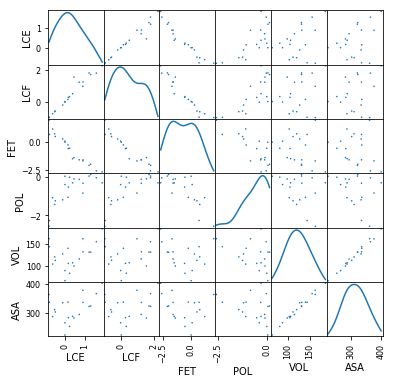

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data2, alpha=1.0, figsize=(6,6), diagonal='kde', s=10)
# kernel density estimation(KDE) -> aesthetically pleasing method than histogram

### Drop Amino Acid column

In [9]:
data3=data.iloc[:,1:7]
print data3

     LCE   LCF   FET   POL    VOL    ASA
0   0.23  0.31 -0.55 -0.02   82.2  254.2
1  -0.48 -0.60  0.51 -1.24  112.3  303.6
2  -0.61 -0.77  1.20 -1.08  103.7  287.9
3   0.45  1.54 -1.40 -0.11   99.1  282.9
4  -0.11 -0.22  0.29 -1.19  127.5  335.0
5  -0.51 -0.64  0.76 -1.43  120.5  311.6
6   0.00  0.00  0.00  0.03   65.0  224.9
7   0.15  0.13 -0.25 -1.06  140.6  337.2
8   1.20  1.80 -2.10  0.04  131.7  322.6
9   1.28  1.70 -2.00  0.12  131.5  324.0
10 -0.77 -0.99  0.70 -2.26  144.3  336.6
11  0.90  1.23 -1.60 -0.33  132.3  336.3
12  1.56  1.79 -2.60 -0.05  155.8  366.1
13  0.38  0.49 -1.50 -0.31  106.7  288.5
14  0.00 -0.04  0.09 -0.40   88.5  266.7
15  0.17  0.26 -0.58 -0.53  105.3  283.9
16  1.85  2.25 -2.70 -0.31  185.9  401.8
17  0.89  0.96 -1.70 -0.84  162.7  377.8
18  0.71  1.22 -1.60 -0.13  115.6  295.1
19 -0.79 -1.01  2.00 -2.56  163.0  363.4


## 2. Preprocessing

### Scale preprocessing

### Why we need to scale the features?

#### If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

### How to scale? Standardisation

#### Standardisation replaces the values by their Z scores.

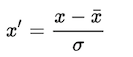

#### This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python.

In [10]:
from sklearn import preprocessing
data4 = preprocessing.scale(data3)
print data4

[[-0.12544001 -0.16011182  0.07813213  0.88929541 -1.41822527 -1.42327794]
 [-1.06293901 -1.06791092  0.89409325 -0.74711545 -0.38983258 -0.26695971]
 [-1.23459375 -1.23749976  1.42523775 -0.53250419 -0.68365906 -0.63445356]
 [ 0.16505264  1.06691334 -0.57617632  0.76857658 -0.84082206 -0.75148981]
 [-0.57438319 -0.68882998  0.72474283 -0.68004943  0.12948865  0.468028  ]
 [-1.10255164 -1.10781418  1.08653691 -1.00196633 -0.10967244 -0.07970169]
 [-0.42913687 -0.46936206  0.50150818  0.95636143 -2.00587824 -2.10911041]
 [-0.2310737  -0.33967648  0.30906452 -0.50567778  0.57706155  0.51952395]
 [ 1.15536849  1.32628451 -1.11501857  0.96977464  0.2729853   0.17777808]
 [ 1.26100218  1.22652637 -1.03804111  1.07708027  0.26615213  0.21054823]
 [-1.44586114 -1.45696768  1.04035043 -2.11526224  0.70347527  0.5054796 ]
 [ 0.75924215  0.75766309 -0.73013125  0.4734861   0.29348482  0.49845742]
 [ 1.63072009  1.31630869 -1.49990589  0.8490558   1.09638277  1.19599352]
 [ 0.07262316  0.01945284

### Transpose data4 because we don't want to find amino acid relationship but descriptors.

In [11]:
import numpy as np
data4T = np.transpose(data4)
print data4T
print data4T.shape

[[-0.12544001 -1.06293901 -1.23459375  0.16505264 -0.57438319 -1.10255164
  -0.42913687 -0.2310737   1.15536849  1.26100218 -1.44586114  0.75924215
   1.63072009  0.07262316 -0.42913687 -0.20466527  2.01364222  0.74603794
   0.50836213 -1.47226956]
 [-0.16011182 -1.06791092 -1.23749976  1.06691334 -0.68882998 -1.10781418
  -0.46936206 -0.33967648  1.32628451  1.22652637 -1.45696768  0.75766309
   1.31630869  0.01945284 -0.50926532 -0.20999089  1.77519615  0.48831611
   0.74768728 -1.4769193 ]
 [ 0.07813213  0.89409325  1.42523775 -0.57617632  0.72474283  1.08653691
   0.50150818  0.30906452 -1.11501857 -1.03804111  1.04035043 -0.73013125
  -1.49990589 -0.65315378  0.5707879   0.05503889 -1.57688336 -0.80710871
  -0.73013125  2.04105747]
 [ 0.88929541 -0.74711545 -0.53250419  0.76857658 -0.68004943 -1.00196633
   0.95636143 -0.50567778  0.96977464  1.07708027 -2.11526224  0.4734861
   0.8490558   0.5003125   0.37959367  0.20522202  0.5003125  -0.2105873
   0.74175017 -2.51765836]
 [-1.4

In [12]:
print np.cov(data4T)

[[ 1.05263158  1.02209582 -1.01445537  0.77448679  0.39337168  0.40350381]
 [ 1.02209582  1.05263158 -1.01332107  0.81225668  0.29817075  0.30551356]
 [-1.01445537 -1.01332107  1.05263158 -0.81451204 -0.28078691 -0.29117762]
 [ 0.77448679  0.81225668 -0.81451204  1.05263158 -0.36770537 -0.34854995]
 [ 0.39337168  0.29817075 -0.28078691 -0.36770537  1.05263158  1.04257608]
 [ 0.40350381  0.30551356 -0.29117762 -0.34854995  1.04257608  1.05263158]]


## 3. PCA

### What is PCA?

#### Principal Component Analysis is a technique of dimension reduction. We usually are surrounded by data with a large number of variables, some of which might be correlated. This correlation between variables brings about a redundancy in the information that can be gathered by the data set. Thus in order to reduce the computational and cost complexities, we use PCA to transform the original variables to the linear combination of these variables which are independent. 

### Why we use PCA?

#### 1. A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. 

#### 2. Another common application of PCA is for data visualization. PCA can make 2 dimensional visual graph even your features are more than three dimensions. Visualizing is quite an important on the data analysis that give you an insight of the data.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.cov(data4T))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.50199526, -0.50980898,  0.5152074 , -0.46442386, -0.05601929,
        -0.06188068],
       [-0.10290101, -0.043231  ,  0.0432292 ,  0.37185674, -0.65287143,
        -0.64896468]])

### Explained Variance

#### The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 6 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.55% of the variance and the second principal component contains 27.44% of the variance. Together, the two components contain 99.99% of the information.

In [15]:
print(pca.explained_variance_ratio_)

[0.72549081 0.27441356]


In [16]:
label = ['LCE', 'LCF', 'FET', 'POL', 'VOL', 'ASA']
print label
print(data.index)

['LCE', 'LCF', 'FET', 'POL', 'VOL', 'ASA']
RangeIndex(start=0, stop=20, step=1)


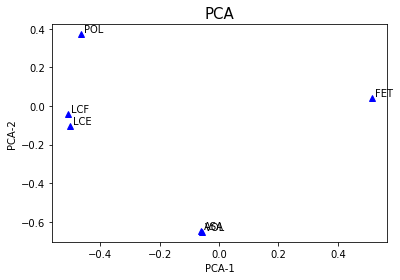

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA', fontsize=15)
plt.plot(pca.components_[0], pca.components_[1], 'b^') # ^b means that triangle blue
for i in range(len(label)):
    plt.text(pca.components_[0][i]+0.01, pca.components_[1][i]+0.01, label[i], None, 'left')

### Now we are going to use PCA to the Amino Acid. Extract only values first and scale it.

In [18]:
al1=data.iloc[:,1:7]
print al1
al=al1.values
print(al)

     LCE   LCF   FET   POL    VOL    ASA
0   0.23  0.31 -0.55 -0.02   82.2  254.2
1  -0.48 -0.60  0.51 -1.24  112.3  303.6
2  -0.61 -0.77  1.20 -1.08  103.7  287.9
3   0.45  1.54 -1.40 -0.11   99.1  282.9
4  -0.11 -0.22  0.29 -1.19  127.5  335.0
5  -0.51 -0.64  0.76 -1.43  120.5  311.6
6   0.00  0.00  0.00  0.03   65.0  224.9
7   0.15  0.13 -0.25 -1.06  140.6  337.2
8   1.20  1.80 -2.10  0.04  131.7  322.6
9   1.28  1.70 -2.00  0.12  131.5  324.0
10 -0.77 -0.99  0.70 -2.26  144.3  336.6
11  0.90  1.23 -1.60 -0.33  132.3  336.3
12  1.56  1.79 -2.60 -0.05  155.8  366.1
13  0.38  0.49 -1.50 -0.31  106.7  288.5
14  0.00 -0.04  0.09 -0.40   88.5  266.7
15  0.17  0.26 -0.58 -0.53  105.3  283.9
16  1.85  2.25 -2.70 -0.31  185.9  401.8
17  0.89  0.96 -1.70 -0.84  162.7  377.8
18  0.71  1.22 -1.60 -0.13  115.6  295.1
19 -0.79 -1.01  2.00 -2.56  163.0  363.4
[[ 2.300e-01  3.100e-01 -5.500e-01 -2.000e-02  8.220e+01  2.542e+02]
 [-4.800e-01 -6.000e-01  5.100e-01 -1.240e+00  1.123e+02  3.036e+02]
 

In [19]:
aa=preprocessing.scale(al)
print aa

[[-0.12544001 -0.16011182  0.07813213  0.88929541 -1.41822527 -1.42327794]
 [-1.06293901 -1.06791092  0.89409325 -0.74711545 -0.38983258 -0.26695971]
 [-1.23459375 -1.23749976  1.42523775 -0.53250419 -0.68365906 -0.63445356]
 [ 0.16505264  1.06691334 -0.57617632  0.76857658 -0.84082206 -0.75148981]
 [-0.57438319 -0.68882998  0.72474283 -0.68004943  0.12948865  0.468028  ]
 [-1.10255164 -1.10781418  1.08653691 -1.00196633 -0.10967244 -0.07970169]
 [-0.42913687 -0.46936206  0.50150818  0.95636143 -2.00587824 -2.10911041]
 [-0.2310737  -0.33967648  0.30906452 -0.50567778  0.57706155  0.51952395]
 [ 1.15536849  1.32628451 -1.11501857  0.96977464  0.2729853   0.17777808]
 [ 1.26100218  1.22652637 -1.03804111  1.07708027  0.26615213  0.21054823]
 [-1.44586114 -1.45696768  1.04035043 -2.11526224  0.70347527  0.5054796 ]
 [ 0.75924215  0.75766309 -0.73013125  0.4734861   0.29348482  0.49845742]
 [ 1.63072009  1.31630869 -1.49990589  0.8490558   1.09638277  1.19599352]
 [ 0.07262316  0.01945284

In [20]:
pc1=[]
pc2=[]
for i in range(20):
    t1=0
    t2=0
    for j in range(6):
        t1=t1+aa[i][j]*pca.components_[0][j]
        t2=t2+aa[i][j]*pca.components_[1][j]
    pc1.append(t1)
    pc2.append(t2)
print(pc1)
print(pc2)

[-0.06063764836661685, 1.9240004090232832, 2.3098079012006774, -1.1869682918804005, 1.2925176415718513, 2.1544540013450804, 0.5118143834687796, 0.6187741004364258, -2.307287022371804, -2.3212780229857986, 2.9162775274688233, -1.4107523654629401, -2.7921916102309132, -0.544292845508657, 0.7301922959429484, 0.22313270181915845, -3.2053760284069153, -1.1070627181153736, -1.312674923286546, 3.567550514338935]
[2.203473654841586, 0.34413334287772135, 0.9022153268704203, 1.2344239797928376, -0.5209405757603137, -0.04094663452817721, 3.1200776094615934, -0.8501165033882934, -0.1574053086991753, -0.13753796895566145, -1.317151581686812, -0.48146442953920066, -1.46577523456311, 0.9315426708701899, 1.7511714121335458, 0.9919827226806472, -2.871735022220784, -2.0346714282079175, 0.6428950803604584, -2.2441711123395596]


['Ala' 'Asn' 'Asp' 'Cys' 'Gln' 'Glu' 'Gly' 'His' 'Ile' 'Leu' 'Lys' 'Met'
 'Phe' 'Pro' 'Ser' 'Thr' 'Trp' 'Tyr' 'Val' 'Arg']


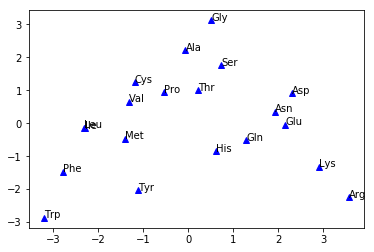

In [21]:
amino=data['AA'].values
print(amino)
plt.plot(pc1, pc2, 'b^')
for i in range(len(amino)):
    plt.text(pc1[i],pc2[i],amino[i],None,'left')

## 4. clustering - K-Means

### Algorithm: K-Means + + ( better start position )

#### 1. 관측치들은 랜덤하게 k개 클러스터에 할당된다.
#### 2. 각 클러스터의 무게중심이 계산되고 이 무게중심들은 큰 디스크로 표현된다. 초기에는 클러스터 할당이 랜덤하게 선택되므로 이 무게중심들은 중앙 쪽에 거의 완전히 겹쳐져 있다.
#### 3. 각 관측치를 가장 가까운 클러스터에 할당한다.
#### 4. 2가 다시한번 수행되어 새로운 클러스터 무게중심이 계산되어 클러스터 중심이 움직인다.
#### 5. 더이상 좋아지지 않을때까지 반복한다.

In [22]:
aa_points = []
for i in range(len(pc1)):
    aa_points.append([pc1[i], pc2[i]])
    
aa_points = np.asarray(aa_points)

In [23]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=3)

# fit kmeans object to data
kmeans.fit(aa_points)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[ 2.11191173 -0.53242539]
 [-0.2342049   1.55365245]
 [-2.19065796 -1.19143157]]


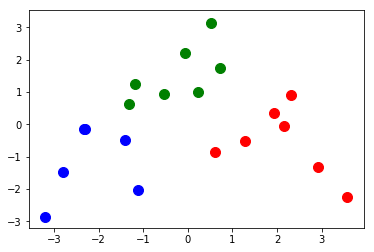

In [26]:
# save new clusters for chart

y_km = kmeans.fit_predict(aa_points)

plt.scatter(aa_points[y_km ==0,0], aa_points[y_km == 0,1], s=100, c='blue')
plt.scatter(aa_points[y_km ==1,0], aa_points[y_km == 1,1], s=100, c='red')
plt.scatter(aa_points[y_km ==2,0], aa_points[y_km == 2,1], s=100, c='green')

#### Group blue = Trp(W), Phe(F), Tyr(Y), Met(M), Leu(L), Lie(I)
#### Group green = Val(V), Cys(C), Pro(P), Ala(A), Thr(T), Ser(S), Gly(G)
#### Group red = His(H), Gln(G), Asn(N), Asp(D), Glu(E), Lys(K), Arg(R)

### Amino Acid Chemical Realtionship

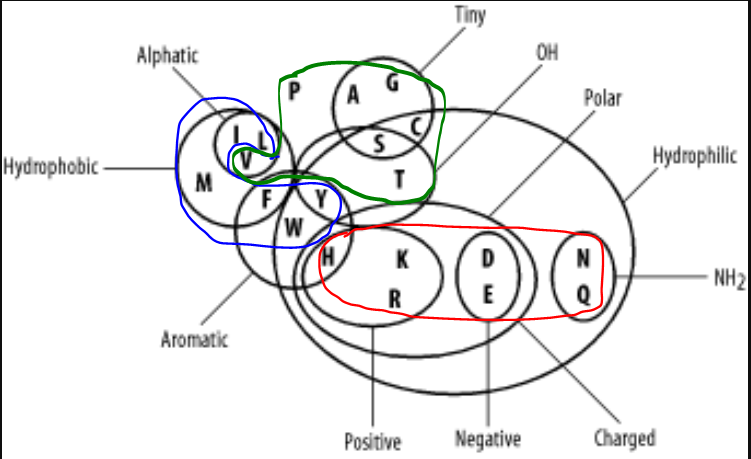



make group and find similarity between group 

## Blue
- Alphatic
- Hydrophobic
- Aromatic

## Green
- Tiny

## Red
- Charged(Positive, Negative)
- Polar
- NH2

## 5. Result

### It can be seen that similar amino acids are indeed grouped roughly together, with the charged and polar amino acids in one region (e.g. Arg, Lys, Glu, Asp), the small hydrophobic amino acids forming another group (e.g. Ala, Pro, Val) and the aromatic amino acids in a third region(e.g. Phe, Trp).

### we have considered descriptors that are commonly used when handling the large data sets often encountered in chemoinformatics